## Model simuleren: populatiemodel

$$\frac{dS}{dt}= -\beta SI$$
$$\frac{dI}{dt}= \beta SI - \gamma I$$
$$\frac{dR}{dt}= \gamma I$$

In [1]:
%matplotlib inline

In [2]:
# Importeren van functionaliteiten
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import Image
from ipywidgets import interact, fixed, ToggleButtons, IntSlider, FloatSlider, interactive
%load_ext autoreload
%autoreload 1
%aimport corona
#from populatie import populatie_model   # Importeren van de populatie functies

## Model simuleren

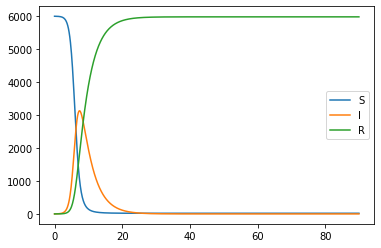

In [3]:
model = corona.populatie_model(np.arange(0., 90, 0.1), S_0=6000, I_0=1, R_0=0, beta=0.0002856, gamma=0.2981930)

## Impact parameters (deel 1)

In [4]:
interact(corona.populatie_model, tijdstappen=fixed(np.arange(0., 90, 0.1)), S_0=fixed(6000), 
         I_0=fixed(1), R_0=fixed(0),
         beta=FloatSlider(value=1e-4, min=1e-5, max=5e-4, step=1e-5,
                          continuous_update=True, readout_format='.1e'),
         gamma=FloatSlider(value=0.2, min=0, max=0.4, step=0.01,
                          continuous_update=True, readout_format='.1e'),
         returnDataFrame=fixed(False));

interactive(children=(FloatSlider(value=0.0001, description='beta', max=0.0005, min=1e-05, readout_format='.1e…

## Impact parameters en maatregelen

De dag dat er maatregelen worden genomen heeft een grote invloed op de eerste piek van de infecties. Wanneer er maatregelen worden genomen, kan de vroegtijdige ontspanning van deze maatregelen het verschijnen van een tweede piek van infecties uitlokken. De mate van opsluiting bepaalt ook de snelheid waarmee de infecties toenemen.

In [5]:
def stapmodel(start, relax, beta_unconf, beta_quaran, gamma):
    tmin = 0.01
    tmax = 50.
    dt = 0.1
    fase1 = np.arange(tmin, start, dt)
    fase2 = np.arange(start, relax, dt)
    fase3 = np.arange(relax, tmax, dt)
    model1 = corona.populatie_model(fase1, S_0=6000, I_0=1, R_0=0, beta=beta_unconf, gamma=gamma, plotFig=False)
    model2 = corona.populatie_model(fase2, S_0=model1.S.iloc[-1], I_0=model1.I.iloc[-1], R_0=model1.R.iloc[-1], beta=beta_quaran, gamma=gamma, plotFig=False)
    model3 = corona.populatie_model(fase3, S_0=model2.S.iloc[-1], I_0=model2.I.iloc[-1], R_0=model2.R.iloc[-1], beta=beta_unconf, gamma=gamma, plotFig=False)
    model = pd.concat([model1, model2, model3])
    tijd = model.index
    model.plot()
    plt.plot(tijd, 2e3*np.ones(tijd.size),'r--')

interact(stapmodel, 
         start=FloatSlider(value=4.9, min=0.1, max=4.9, step=0.1, continuous_update=True, readout_format='2.1f'), 
         relax=FloatSlider(value=50., min=5., max=50., step=1., continuous_update=True, readout_format='2.0f'),
         beta_unconf=FloatSlider(value=5e-4, min=1e-4, max=1e-3, step=1e-5, continuous_update=True, readout_format='.1e'),
         beta_quaran=FloatSlider(value=1e-4, min=1e-5, max=5e-4, step=1e-5, continuous_update=True, readout_format='.1e'),
         gamma=FloatSlider(value=0.2, min=0, max=0.4, step=0.01, continuous_update=True, readout_format='.2f'))

interactive(children=(FloatSlider(value=4.9, description='start', max=4.9, min=0.1, readout_format='2.1f'), Fl…

<function __main__.stapmodel(start, relax, beta_unconf, beta_quaran, gamma)>

## sensitivity

In [6]:
interact(corona.sensitiviteit,
    tijdstappen=fixed(np.arange(0., 90, 0.1)), # tijdstappen
    init=fixed([6000, 1, 0]), # initiële condities
    varnames=fixed(['S','I', 'R']), # namen variabelen
    f=fixed(corona.model_afgeleiden), # naam functie afgeleiden
    parameternaam=ToggleButtons(options=['beta', 'gamma']),
    log_perturbatie = IntSlider(value=-4, min=-15, max=-1, step=1, continuous_update=False),
    soort=ToggleButtons(options=[
            'absolute sensitiviteit', 'relatieve sensitiviteit parameter',
            'relatieve sensitiviteit variabele','relatieve totale sensitiviteit']),
    # vanaf hier: functie specifieke parameters
    beta=fixed(0.0001), gamma=fixed(0.1))

interactive(children=(ToggleButtons(description='parameternaam', options=('beta', 'gamma'), value='beta'), Int…

<function corona.sensitiviteit(tijdstappen, init, varnames, f, parameternaam, log_perturbatie=-4, soort='absoluut', **kwargs)>